<a href="https://colab.research.google.com/github/SharpQuagga/Colab_Notebooks/blob/master/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Importing Data

In [0]:
dataset_train = pd.read_csv('/content/drive/My Drive/data/data_rnn/Google_Stock_Price_Train.csv')

In [0]:
training_set = dataset_train.iloc[:,1:2].values

In [0]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

60 timesteps and 1 output

In [0]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
regressor = Sequential()

regressor.add(LSTM(units= 50, return_sequences= True, input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2)) 

regressor.add(LSTM(units= 50, return_sequences= False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units= 1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.compile(optimizer='adam', loss= 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 24s 20ms/step - loss: 0.0618
Epoch 2/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0050
Epoch 3/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0065
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0050
Epoch 10/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [=============

Getting test data

In [0]:
dataset_test = pd.read_csv('/content/drive/My Drive/data/data_rnn/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) -len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(X_test)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualization

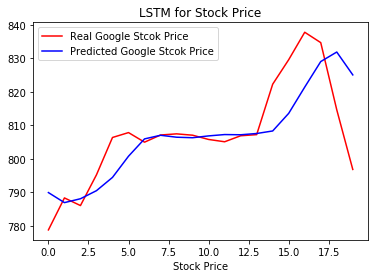

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stcok Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stcok Price')
plt.title('LSTM for Stock Price')
plt.xlabel('Time')
plt.xlabel('Stock Price')
plt.legend()
plt.show()